In [1]:
import numpy as np
from scipy.stats import zscore

In [2]:
data = np.genfromtxt("data_preprocessed.csv", delimiter=',')[1:, 1:]
print(data[:10])
print(np.shape(data))

[[  1.      0.      2.792   1.     -1.   ]
 [  1.      0.      1.206   1.     -2.   ]
 [  1.      0.      0.991   1.     -3.   ]
 [  1.      0.      1.256   1.     -4.   ]
 [  1.      0.      1.005   1.     -5.   ]
 [  1.      0.      1.409   1.     -6.   ]
 [  1.      0.      1.08    1.     -7.   ]
 [  1.      0.      1.308   1.     -8.   ]
 [  1.      0.      1.338   1.     -9.   ]
 [  1.      0.      0.927   1.    -10.   ]]
(18800, 5)


In [3]:
# remove all trials less than 250 ms and greater than 10.5 s
trialsMoreThan250ms = data[data[:, 2] > 0.25]
trialsLessThan10_5s = trialsMoreThan250ms[trialsMoreThan250ms[:, 2] < 10.5]
print(np.shape(trialsLessThan10_5s))
trialsLessThan10_5s

(18790, 5)


array([[  1.   ,   0.   ,   2.792,   1.   ,  -1.   ],
       [  1.   ,   0.   ,   1.206,   1.   ,  -2.   ],
       [  1.   ,   0.   ,   0.991,   1.   ,  -3.   ],
       ...,
       [ 94.   ,   1.   ,   0.98 ,  10.   ,  -8.   ],
       [ 94.   ,   1.   ,   0.78 ,  10.   ,  -9.   ],
       [ 94.   ,   1.   ,   0.751,  10.   , -10.   ]])

In [4]:
def getTrials(gain, loss, choice):
    trialsGain = trialsLessThan10_5s[trialsLessThan10_5s[:, 3] == gain]
    trialsLoss = trialsGain[trialsGain[:, 4] == loss]
    trialsChoice = trialsLoss[trialsLoss[:, 1] == choice]
    
    return trialsChoice

In [5]:
def getCleanedTrialsZScore(gain, loss, choice):
    print(gain, loss, choice)
    trials = getTrials(gain, loss, choice)
    reactionTimes = trials[:, 2]
    zScores = np.abs(zscore(reactionTimes))
    cleanedTrials = trials[zScores < 3]
    
    return cleanedTrials
    
allStakes = np.unique(data[:, -2:], axis=0)

allZScoreCleanedTrials = [getCleanedTrialsZScore(*stakes, choice) for stakes in allStakes for choice in range(0, 2)]
allZScoreCleanedTrialsArray = np.vstack(allZScoreCleanedTrials)
print(np.shape(allZScoreCleanedTrialsArray))

1.0 -10.0 0
1.0 -10.0 1
1.0 -9.0 0
1.0 -9.0 1
1.0 -8.0 0
1.0 -8.0 1
1.0 -7.0 0
1.0 -7.0 1
1.0 -6.0 0
1.0 -6.0 1
1.0 -5.0 0
1.0 -5.0 1
1.0 -4.0 0
1.0 -4.0 1
1.0 -3.0 0
1.0 -3.0 1
1.0 -2.0 0
1.0 -2.0 1
1.0 -1.0 0
1.0 -1.0 1
2.0 -10.0 0
2.0 -10.0 1
2.0 -9.0 0
2.0 -9.0 1
2.0 -8.0 0
2.0 -8.0 1
2.0 -7.0 0
2.0 -7.0 1
2.0 -6.0 0
2.0 -6.0 1
2.0 -5.0 0
2.0 -5.0 1
2.0 -4.0 0
2.0 -4.0 1
2.0 -3.0 0
2.0 -3.0 1
2.0 -2.0 0
2.0 -2.0 1
2.0 -1.0 0
2.0 -1.0 1
3.0 -10.0 0
3.0 -10.0 1
3.0 -9.0 0
3.0 -9.0 1
3.0 -8.0 0
3.0 -8.0 1
3.0 -7.0 0
3.0 -7.0 1
3.0 -6.0 0
3.0 -6.0 1
3.0 -5.0 0
3.0 -5.0 1
3.0 -4.0 0
3.0 -4.0 1
3.0 -3.0 0
3.0 -3.0 1
3.0 -2.0 0
3.0 -2.0 1
3.0 -1.0 0
3.0 -1.0 1
4.0 -10.0 0
4.0 -10.0 1
4.0 -9.0 0
4.0 -9.0 1
4.0 -8.0 0
4.0 -8.0 1
4.0 -7.0 0
4.0 -7.0 1
4.0 -6.0 0
4.0 -6.0 1
4.0 -5.0 0
4.0 -5.0 1
4.0 -4.0 0
4.0 -4.0 1
4.0 -3.0 0
4.0 -3.0 1
4.0 -2.0 0
4.0 -2.0 1
4.0 -1.0 0
4.0 -1.0 1
5.0 -10.0 0
5.0 -10.0 1
5.0 -9.0 0
5.0 -9.0 1
5.0 -8.0 0
5.0 -8.0 1
5.0 -7.0 0
5.0 -7.0 1
5.0 -6.0 0
5.0 -6.0 1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [6]:
allZScoreCleanedTrialsArray[:10, :]

array([[  1.   ,   0.   ,   0.927,   1.   , -10.   ],
       [  1.   ,   0.   ,   1.367,   1.   , -10.   ],
       [  2.   ,   0.   ,   1.095,   1.   , -10.   ],
       [  2.   ,   0.   ,   0.756,   1.   , -10.   ],
       [  3.   ,   0.   ,   0.827,   1.   , -10.   ],
       [  3.   ,   0.   ,   1.06 ,   1.   , -10.   ],
       [  4.   ,   0.   ,   1.005,   1.   , -10.   ],
       [  4.   ,   0.   ,   1.137,   1.   , -10.   ],
       [  5.   ,   0.   ,   1.038,   1.   , -10.   ],
       [  5.   ,   0.   ,   0.931,   1.   , -10.   ]])

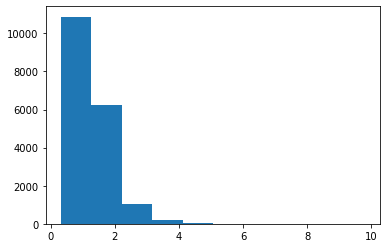

In [8]:
from matplotlib import pyplot as plt
plt.hist(allZScoreCleanedTrialsArray[:, 2].flatten())
plt.show()

In [9]:
np.savetxt("data_cleaned_250_10500_zScore3.csv", allZScoreCleanedTrialsArray, delimiter=",")